### Student Activity: Portfolio Planner Part I

This program is part 1 of a two-part student activity and begins the following:

`PART 1: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART 2: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

To be continued in the second part!


In [155]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs as DataFrames 

In [156]:
# Set the file paths
bk_data = Path("../Resources/bk_data.csv")
fang_data = Path("../Resources/fang_data.csv")
jnj_data = Path("../Resources/jnj_data.csv")
luv_data = Path("../Resources/luv_data.csv")
mu_data = Path("../Resources/mu_data.csv")
nke_data = Path("../Resources/nke_data.csv")
sbux_data = Path("../Resources/sbux_data.csv")
t_data = Path("../Resources/t_data.csv")
wdc_data = Path("../Resources/wdc_data.csv")
wrk_data = Path("../Resources/wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True).drop_duplicates()

# Display a few rows
wrk_df.head()

,close
date,
2019-05-20,35.15
2019-05-17,36.66
2019-05-16,37.42
2019-05-15,37.44
2019-05-14,37.19


### Combine DataFrames, Sort Index, and Rename Columns

In [157]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis='columns', join='inner')

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns=['bk', 'fang', 'jnj', 'luv', 'mu', 'nke', 'sbux', 't', 'wdc', 'wrk']

# Display a few rows
combined_df.head(5)

,bk,fang,jnj,luv,mu,nke,sbux,t,wdc,wrk
date,,,,,,,,,,
2015-06-30,41.97,75.38,97.46,33.09,18.84,54.010,53.615,35.52,78.42,56.2781
2015-07-23,44.47,66.29,100.20,36.48,18.70,57.000,56.560,33.93,77.90,55.3078
2015-07-27,43.26,63.30,98.28,35.09,18.12,55.865,56.980,34.32,76.49,53.7738
2015-08-24,38.64,61.75,92.82,37.21,14.44,51.935,50.340,32.37,76.92,52.1751
2015-09-02,39.02,67.45,93.35,37.72,16.29,55.350,55.260,32.82,81.15,53.7553


### Calculate Daily Returns

In [158]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change().dropna()
daily_returns.head(5)

,bk,fang,jnj,luv,mu,nke,sbux,t,wdc,wrk
date,,,,,,,,,,
2015-07-23,0.059566,-0.120589,0.028114,0.102448,-0.007431,0.055360,0.054929,-0.044764,-0.006631,-0.017241
2015-07-27,-0.027209,-0.045105,-0.019162,-0.038103,-0.031016,-0.019912,0.007426,0.011494,-0.018100,-0.027736
2015-08-24,-0.106796,-0.024487,-0.055556,0.060416,-0.203091,-0.070348,-0.116532,-0.056818,0.005622,-0.029730
2015-09-02,0.009834,0.092308,0.005710,0.013706,0.128116,0.065755,0.097735,0.013902,0.054992,0.030286
2015-10-06,0.024090,0.076056,0.000750,0.007423,0.118478,0.112827,0.062070,0.014930,0.023044,-0.066356


### Evaluate Riskiness of Stocks

In [159]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility

bk      0.495031
fang    0.760759
jnj     0.376016
luv     0.764744
mu      1.001654
nke     0.482448
sbux    0.471607
t       0.457591
wdc     0.788559
wrk     0.686611
dtype: float64

### Drop High Volatility Stocks

In [160]:
# Drop the five stocks with the highest volatility in daily returns
daily_returns.drop(columns=['mu', 'wdc', 'luv', 'fang', 'wrk'], inplace=True)
daily_returns.head(5)

,bk,jnj,nke,sbux,t
date,,,,,
2015-07-23,0.059566,0.028114,0.055360,0.054929,-0.044764
2015-07-27,-0.027209,-0.019162,-0.019912,0.007426,0.011494
2015-08-24,-0.106796,-0.055556,-0.070348,-0.116532,-0.056818
2015-09-02,0.009834,0.005710,0.065755,0.097735,0.013902
2015-10-06,0.024090,0.000750,0.112827,0.062070,0.014930


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

In [161]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
# BK, LUV, NKE, SBUX, T
weights = [0.10, 0.5, 0.05, 0.15, 0.20]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns

date
2015-07-23    0.022068
2015-07-27   -0.009885
2015-08-24   -0.070818
2015-09-02    0.024567
2015-10-06    0.020722
                ...   
2019-05-07   -0.011073
2019-05-09   -0.006009
2019-05-13   -0.008861
2019-05-16    0.015338
2019-05-17    0.001788
Length: 187, dtype: float64

### Calculate Cumulative Returns

In [162]:
# Use the `cumprod` function to calculate cumulative returns
cum_returns = portfolio_returns.cumprod()
cum_returns

date
2015-07-23    2.206829e-02
2015-07-27   -2.181379e-04
2015-08-24    1.544814e-05
2015-09-02    3.795122e-07
2015-10-06    7.864192e-09
                  ...     
2019-05-07    0.000000e+00
2019-05-09   -0.000000e+00
2019-05-13    0.000000e+00
2019-05-16    0.000000e+00
2019-05-17    0.000000e+00
Length: 187, dtype: float64

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

<AxesSubplot:xlabel='date'>

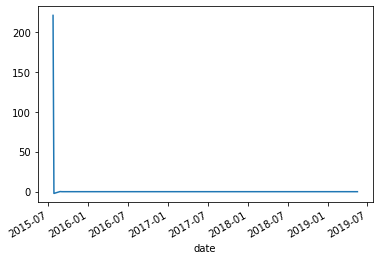

In [163]:
initial_investment = 10000
cum_profit = initial_investment * cum_returns
cum_profit.plot()
# Plot the returns of the portfolio in terms of money
